<a href="https://colab.research.google.com/github/sergeymasl/pandas_cource/blob/main/Summary_Functions_and_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summary Functions and Maps**

В предыдущем уроке мы изучили как отфильровать и выбрать только те данные которые тебуются для решения задачи.

Но при выборе отдельных данных, они не всегда предстают в том виде в котором нам это небходимо. Иногда нам нужно самостоятельно транформировать данные для решения задачи.

В этом уроке мы рассмотрим несколько операций, которые мы сможем применить для преобразовани данных в вид "вот теперь как надо".


Для демонстрации мы будем использовать датасет с данными о винах.

In [2]:
# импорт библиотеки
import pandas as pd
# загрузка датасета для дальнейшей работы
reviews = pd.read_csv("https://drive.google.com/uc?export=download&id=1z-1idT4mGbOvHgmEPzneqV54EJ1-w7tk", index_col=0)
# настройки по отображению строк
pd.set_option('max_rows', 5)

In [3]:
reviews

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


## **Функции для сводной информации о массиве**

Pandas имеет в своём арсенале много простых функций для предоставления, так называемой сводной информации. Для примера, рассмотрим метод ```describe()```:

In [ ]:
reviews['points'].describe()

count    129971.000000
mean         88.447138
             ...      
75%          91.000000
max         100.000000
Name: points, Length: 8, dtype: float64

Out:

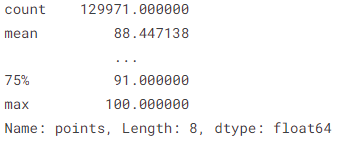

Данный метод предоставляет сводную информацию, которую можно получить из столбца. Этот метод зависит от типа данных в столбце, это означает, что метрики получаемые в результате использования метода, будут различаться в столбцах с разными типами данных. Информация выведенная выше, была сгенерирована для числовых значений, вот какие метрики выдаст этот метод при строковом типе данных: 

In [ ]:
reviews['taster_name'].describe()

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

Out:

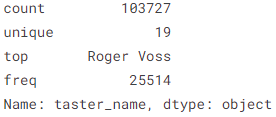

Если же вы хотите получить отдельные несложные сводные метрики по отдельным столбцам, в Pandas существует набор методов которые помогут вам с этим.

Для примера, если мы хотим посмотреть средний-арифметический бал у всех вин, мы можем использовать метод ```mean()```:

In [ ]:
reviews['points'].mean()

Out:

88.44713820775404

Для просмтра **уникальных** значений в столбце, мы можем воспользоваться методом ```unique()```:

In [ ]:
reviews['taster_name'].unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

Out:

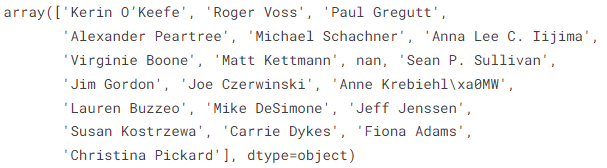

Для просмотра списка уникальных значений и как часто они встречаются в данных, мы можем использовать метод ```value_counts()```:

In [ ]:
reviews['taster_name'].value_counts()

Roger Voss           25514
Michael Schachner    15134
                     ...  
Fiona Adams             27
Christina Pickard        6
Name: taster_name, Length: 19, dtype: int64

Out:

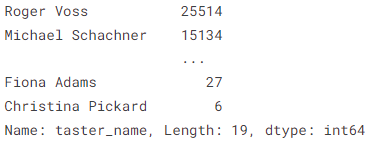

Мы рассмотрели лишь малую часть из всех возможных методов, посмотреть все методы, вы можете [здесь](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#:~:text=empty-,Methods,-abs())

## **Фунции для преобразования каждого элемента или maps**



Термин **map** пришел из математики, где он обозначает функцию, с помощью которой обратывают некую последовательность. 

В работе с данными часто возникает потребность в преобразовании исходных данных. Функции для обработки каждого эллемента последовательности, очень важны для вашей дальейшей работы с данными.

Для таких целей есть два, часто используемых метода.

Первый, так и называется, ```map()```. Рассмотрим его.

Предположим, мы хотим получить разницу оценки каждого вина от среднеарифметического балла:



In [4]:
# для начала найдем средний арифметический бал
review_points_mean = reviews['points'].mean()

# теперь отнимем от каждой оценки получившееся значение
reviews['points'].map(lambda x: x - review_points_mean)

0        -1.447138
1        -1.447138
            ...   
129969    1.552862
129970    1.552862
Name: points, Length: 129971, dtype: float64

Out:

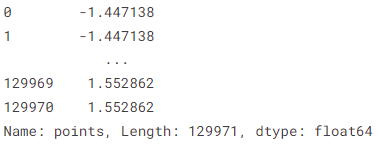

Функция, которую мы используем внутри ```map```, в данном случае ```lambda x: x - review_points_mean```, должна принимать на вход одно значение и возвращять одно, но уже преобразованное, значение.

```map()``` же возвращяет последовательность (Series), в которой **каждый эллемент** был преобразован согласно вложенной функции.


Второй метод, это метод ```apply()```, который является эквивалентом ```map```, но может использоваться для преобразования нескольких столбцов в каждой строки, поэтому метод ```apply()``` возвращяет новый DataFrame, а не только отдельный столбец.
Пример использвания: 

In [9]:
# функция для перобразования строки
def remean_points(row):
    # повторим операцию как в map
    row['points'] = row['points'] - review_points_mean
    # для отображения разницы apply и map
    # преоразуем также еще один столбец
    # приведем description к верхнему регистру
    row['description'] = row['description'].upper()
    return row

reviews.apply(remean_points, axis='columns')

Out:

|    | country   | description                                                                                                                                                                                                                         | designation   |   points |   price | province          | region_1   |   region_2 | taster_name   | taster_twitter_handle   | title                                         | variety        | winery              |
|---:|:----------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------|---------:|--------:|:------------------|:-----------|-----------:|:--------------|:------------------------|:----------------------------------------------|:---------------|:--------------------|
|  0 | Italy     | AROMAS INCLUDE TROPICAL FRUIT, BROOM, BRIMSTONE AND DRIED HERB. THE PALATE ISN'T OVERLY EXPRESSIVE, OFFERING UNRIPENED APPLE, CITRUS AND DRIED SAGE ALONGSIDE BRISK ACIDITY.                                                        | Vulkà Bianco  | -1.44714 |     nan | Sicily & Sardinia | Etna       |        nan | Kerin O’Keefe | @kerinokeefe            | Nicosia 2013 Vulkà Bianco  (Etna)             | White Blend    | Nicosia             |
|  1 | Portugal  | THIS IS RIPE AND FRUITY, A WINE THAT IS SMOOTH WHILE STILL STRUCTURED. FIRM TANNINS ARE FILLED OUT WITH JUICY RED BERRY FRUITS AND FRESHENED WITH ACIDITY. IT'S  ALREADY DRINKABLE, ALTHOUGH IT WILL CERTAINLY BE BETTER FROM 2016. | Avidagos      | -1.44714 |      15 | Douro             | nan        |        nan | Roger Voss    | @vossroger              | Quinta dos Avidagos 2011 Avidagos Red (Douro) | Portuguese Red | Quinta dos Avidagos |
|...|...|...|...|...|...|...|...|...|...|...|...|...|...|
| 129969 | France    | A DRY STYLE OF PINOT GRIS, THIS IS CRISP WITH SOME ACIDITY. IT ALSO HAS WEIGHT AND A SOLID, POWERFUL CORE OF SPICE AND BAKED APPLE FLAVORS. WITH ITS STRUCTURE STILL DEVELOPING, THE WINE NEEDS TO AGE. DRINK FROM 2015. | nan                           |  1.55286 |      32 | Alsace     | Alsace     |        nan | Roger Voss    | @vossroger              | Domaine Marcel Deiss 2012 Pinot Gris (Alsace)                               | Pinot Gris     | Domaine Marcel Deiss |
| 129970 | France    | BIG, RICH AND OFF-DRY, THIS IS POWERED BY INTENSE SPICINESS AND ROUNDED TEXTURE. LYCHEES DOMINATE THE FRUIT PROFILE, GIVING AN OPULENT FEEL TO THE AFTERTASTE. DRINK NOW.                                                | Lieu-dit Harth Cuvée Caroline |  1.55286 |      21 | Alsace     | Alsace     |        nan | Roger Voss    | @vossroger              | Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace) | Gewürztraminer | Domaine Schoffit     |

Если использовать метод ```apply()``` c параметром ```axis='index'```, вместо функции для преобразования каждой строки, необходимо будет использовать функцию для преобразования каждого *столбца*.

>Примечание: методы ```map`` и ```apply``` возвращяют новые, преобразованные Series и DataFrame соответсвенно. Но они не изменяют исходные данные.

>Если мы посмотрим на первую строку DataFrame ```reviwes```, то увидим, что исходные данные не были преобразованы:

Out:

|    | country   | description                                                                                                                                                                  | designation   |   points |   price | province          | region_1   |   region_2 | taster_name   | taster_twitter_handle   | title                             | variety     | winery   |
|---:|:----------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------|---------:|--------:|:------------------|:-----------|-----------:|:--------------|:------------------------|:----------------------------------|:------------|:---------|
|  0 | Italy     | Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity. | Vulkà Bianco  |       87 |     nan | Sicily & Sardinia | Etna       |        nan | Kerin O’Keefe | @kerinokeefe            | Nicosia 2013 Vulkà Bianco  (Etna) | White Blend | Nicosia  |

Больше информации о этих методах можно подчерпнуть из документации:

>Ссылка на документацию по [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)

>Ссылка на документацию по [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

Pandas предоставляет множество способов быстрого преобразования и отображения данных, вот как можно бысто посмотреть разницу баллов от среднего:

In [ ]:
# переменная со средним
review_points_mean = reviews['points'].mean()

reviews['points'] - review_points_mean

Out:

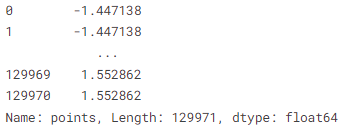

В этом коде мы выполняем операцию между множеством данных с левой стороны (всеми данными в Series) и одиночным значением с правой стороны (среднее арифметическое). В таких случях Pandas понимает, что необходимо совершить опреацию с помощью одиночного выражения с каждым элементом множества.

Pandas также понимает операции между двуми Series(столбцами) или между Series и равному ей по длинне объекту (например списку). Для примера, соединить столбцы ```country``` и ```region``` в датасете, можно вот таким способом:

In [ ]:
# плюс в данном случае подразумевает конкатенацию
reviews['country'] + " - " + reviews['region_1']

Out:

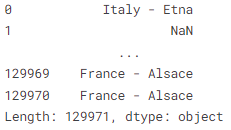

Эти операции быстрее чем ```apply``` и ```map```, потому что они используют ускорители встроенные в Pandas.

Однако они не такие гибкие как ```apply``` и ```map```, в которых функционал позволяет выполнять сложнейшие преобразования .